In [14]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


D:\anaconda3\python.exe: No module named pip


In [15]:
import cv2
print(cv2.__version__)

4.5.3


In [16]:
import os
PATH = 'D:\이미지기반_인공지능\팀프로젝트\팀프로젝트_과제1\data/농산물 품질(QC) 이미지'
for folder in ['Training_unzip_qulity_V2', 'Validation_unzip_qulity_V2']:
    fruit_list = os.listdir(PATH+'/'+folder)
    for fruit in fruit_list:
        total = 0
        print(folder, fruit, os.listdir(PATH+'/'+folder+'/'+fruit))
        image_folder = os.listdir(PATH+'/'+folder+'/'+fruit)
        for image in image_folder:
            total += len(os.listdir(PATH+'/'+folder+'/'+fruit+'/'+image))
        print(fruit, total, '\n')

Training_unzip_qulity_V2 apple ['L', 'M', 'S']
apple 10642 

Training_unzip_qulity_V2 mandarine ['L', 'M', 'S']
mandarine 11110 

Training_unzip_qulity_V2 pear ['L', 'M', 'S']
pear 11088 

Training_unzip_qulity_V2 persimmon ['L', 'M', 'S']
persimmon 19635 

Validation_unzip_qulity_V2 apple ['L', 'M', 'S']
apple 1812 

Validation_unzip_qulity_V2 mandarine ['L', 'M', 'S']
mandarine 1605 

Validation_unzip_qulity_V2 pear ['L', 'M', 'S']
pear 1584 

Validation_unzip_qulity_V2 persimmon ['L', 'M', 'S']
persimmon 2808 



# Generator 만들기

In [17]:
import tensorflow
from tensorflow import keras

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12488114959415419883]

In [19]:
Fruit_name = 'apple'

In [20]:
import math

train_dir = PATH +'/Training_unzip_qulity_V2'+'/'+Fruit_name
size_list = os.listdir(train_dir)
total = 0
for size in size_list:
    total += len(os.listdir(train_dir+'/'+size))
steps_per_epoch = math.ceil(total/30)
print('train total : ', total,' steps_per_epoch : ', steps_per_epoch)

validation_dir = PATH +'/Validation_unzip_qulity_V2'+'/'+Fruit_name
size_list = os.listdir(validation_dir)
total = 0
for size in size_list:
    total += len(os.listdir(validation_dir+'/'+size))
validation_steps = math.ceil(total/30)
print('validation total : ', total,' validation_steps : ', validation_steps)

train total :  10642  steps_per_epoch :  355
validation total :  1812  validation_steps :  61


In [21]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size= 30,
    class_mode='categorical'
    
)

Found 10642 images belonging to 3 classes.


In [23]:
validation_data = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size= 30,
    class_mode='categorical'
)

Found 1812 images belonging to 3 classes.


# 모델 만들기

In [24]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)           

In [26]:
from tensorflow.keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
             loss=losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [27]:
history = model.fit_generator(
train_data,
steps_per_epoch = steps_per_epoch,
epochs=100,
validation_data= validation_data,
validation_steps=validation_steps)

Epoch 1/100
355/355 [==============================] - 669s 2s/step - loss: 0.8203 - accuracy: 0.6332 - val_loss: 0.8955 - val_accuracy: 0.6611
Epoch 2/100
355/355 [==============================] - 628s 2s/step - loss: 0.5900 - accuracy: 0.7652 - val_loss: 0.9833 - val_accuracy: 0.6065
Epoch 3/100
355/355 [==============================] - 629s 2s/step - loss: 0.5479 - accuracy: 0.7850 - val_loss: 0.9454 - val_accuracy: 0.6071
Epoch 4/100
355/355 [==============================] - 628s 2s/step - loss: 0.4970 - accuracy: 0.8066 - val_loss: 1.2008 - val_accuracy: 0.5806
Epoch 5/100
355/355 [==============================] - 628s 2s/step - loss: 0.4692 - accuracy: 0.8148 - val_loss: 0.7912 - val_accuracy: 0.6567
Epoch 6/100
355/355 [==============================] - 628s 2s/step - loss: 0.4374 - accuracy: 0.8281 - val_loss: 0.7495 - val_accuracy: 0.7136
Epoch 7/100
355/355 [==============================] - 627s 2s/step - loss: 0.3874 - accuracy: 0.8487 - val_loss: 0.7464 - val_accuracy:

355/355 [==============================] - 623s 2s/step - loss: 0.1125 - accuracy: 0.9572 - val_loss: 1.2456 - val_accuracy: 0.7450
Epoch 58/100
355/355 [==============================] - 625s 2s/step - loss: 0.1357 - accuracy: 0.9499 - val_loss: 1.2639 - val_accuracy: 0.7483
Epoch 59/100
355/355 [==============================] - 623s 2s/step - loss: 0.1337 - accuracy: 0.9508 - val_loss: 1.4822 - val_accuracy: 0.7379
Epoch 60/100
355/355 [==============================] - 623s 2s/step - loss: 0.1203 - accuracy: 0.9551 - val_loss: 2.0308 - val_accuracy: 0.7219
Epoch 61/100
355/355 [==============================] - 624s 2s/step - loss: 0.1275 - accuracy: 0.9505 - val_loss: 1.2551 - val_accuracy: 0.7561
Epoch 62/100
355/355 [==============================] - 625s 2s/step - loss: 0.1153 - accuracy: 0.9585 - val_loss: 1.5307 - val_accuracy: 0.7340
Epoch 63/100
355/355 [==============================] - 624s 2s/step - loss: 0.1145 - accuracy: 0.9580 - val_loss: 1.2570 - val_accuracy: 0.763

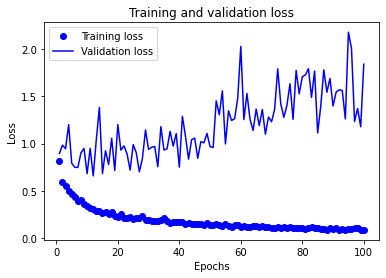

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

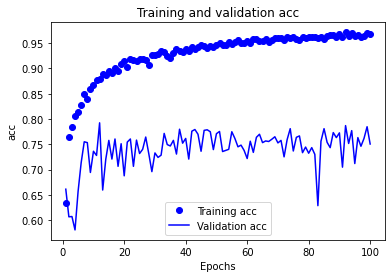

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

# 모델 저장


In [30]:
import os 
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model.save('D:\이미지기반_인공지능\팀프로젝트\팀프로젝트_과제1\data/농산물 모델'+'/'+Fruit_name+'_V1')

2.3.0
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\이미지기반_인공지능\팀프로젝트\팀프로젝트_과제1\data/농산물 모델/apple_V1\assets


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model('D:\이미지기반_인공지능\팀프로젝트\팀프로젝트_과제1\data/농산물 모델/apple_V1')
vali_path = 'D:/이미지기반_인공지능/팀프로젝트/팀프로젝트_과제1/data/농산물 품질(QC) 이미지/Validation_unzip_qulity_Test/'+'apple_yanggwang'
vali_datagen = ImageDataGenerator(rescale=1./255)

vali_data = test_datagen.flow_from_directory(
    vali_path,
    target_size=(256, 256),
    batch_size= 30,
    class_mode='categorical'
)

Found 90 images belonging to 3 classes.


In [45]:
loss, acc = model.evaluate(vali_data, verbose=2)

3/3 - 1s - loss: 3.3596 - accuracy: 0.6667


# 모델 테스트

In [ ]:
# 모델 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model('D:\이미지기반_인공지능\팀프로젝트\팀프로젝트_과제1\data/농산물 모델/apple_fuji_V2')
model.summary()

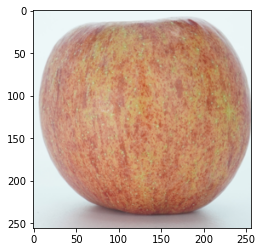

[[2.1851885e-11 9.9895334e-01 1.0466834e-03]]
1
M
apple_fuji_M_82-3_3FR90.png


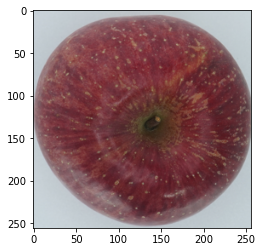

[[0.05075556 0.08159319 0.8676513 ]]
2
S
apple_fuji_S_81-1_1TOP.png


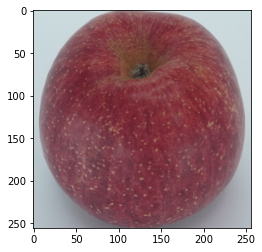

[[9.9133497e-01 8.4973285e-03 1.6765551e-04]]
0
L
apple_fuji_L_79-27_2FR45.png


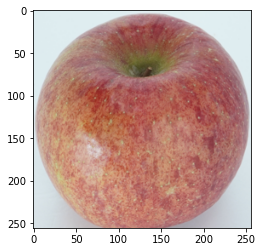

[[1.492342e-11 9.999999e-01 9.370420e-08]]
1
M
apple_fuji_M_82-17_2FR45.png


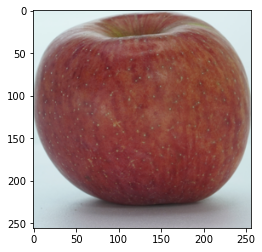

[[3.7854384e-10 1.2108318e-03 9.9878913e-01]]
2
S
apple_fuji_S_78-3_3FR90.png


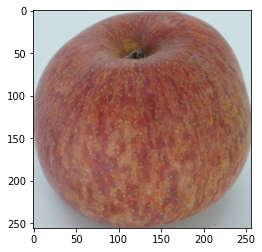

[[7.5816218e-04 8.7579125e-01 1.2345054e-01]]
1
M
apple_fuji_S_77-22_2FR45.png


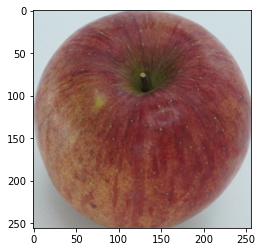

[[3.2495229e-06 2.6514628e-03 9.9734527e-01]]
2
S
apple_fuji_S_80-9_4DI45.png


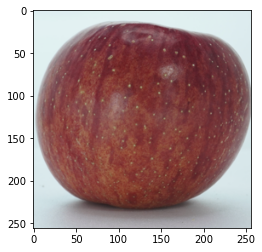

[[1.0962206e-04 2.6147673e-01 7.3841363e-01]]
2
S
apple_fuji_S_81-3_3FR90.png


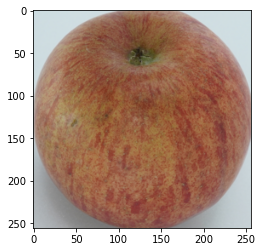

[[1.3928923e-04 1.7741695e-02 9.8211896e-01]]
2
S
apple_fuji_S_80-34_4DI45.png


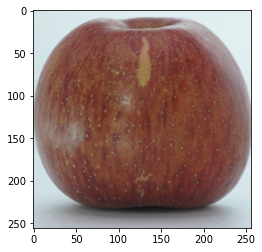

[[1.3324027e-08 8.0330083e-03 9.9196690e-01]]
2
S
apple_fuji_S_77-35_5DI90.png


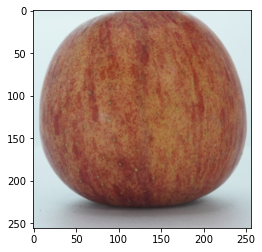

[[1.8395677e-06 9.4097843e-03 9.9058831e-01]]
2
S
apple_fuji_S_80-28_3FR90.png


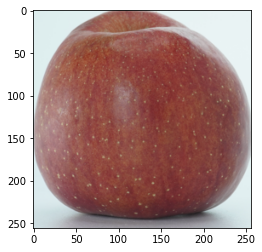

[[9.8754745e-06 6.9001889e-01 3.0997121e-01]]
1
M
apple_fuji_M_83-35_5DI90.png


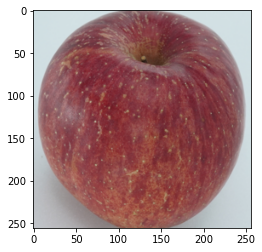

[[0.07951552 0.8215534  0.09893116]]
1
M
apple_fuji_S_81-14_4DI45.png


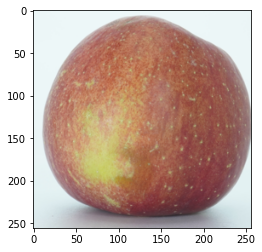

[[2.2762737e-08 9.9972516e-01 2.7487631e-04]]
1
M
apple_fuji_M_83-38_3FR90.png


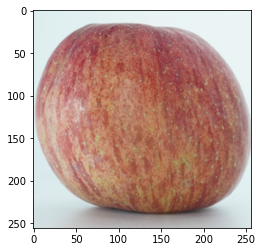

[[8.3035667e-13 9.9947578e-01 5.2423420e-04]]
1
M
apple_fuji_M_78-35_5DI90.png


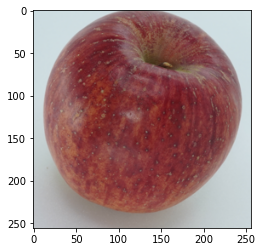

[[7.1380628e-06 3.9273076e-02 9.6071976e-01]]
2
S
apple_fuji_S_84-4_4DI45.png


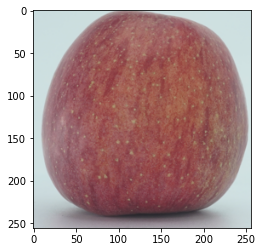

[[9.0280151e-01 9.6451096e-02 7.4737560e-04]]
0
L
apple_fuji_L_81-35_5DI90.png


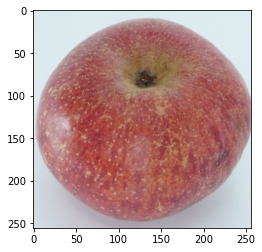

[[2.8977452e-08 9.9997211e-01 2.7914732e-05]]
1
M
apple_fuji_M_85-29_4DI45.png


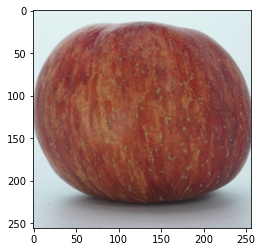

[[5.1777547e-06 3.4024282e-03 9.9659234e-01]]
2
S
apple_fuji_S_82-28_3FR90.png


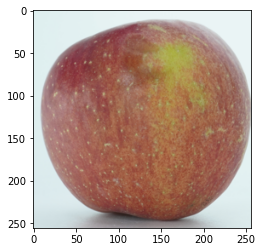

[[2.9255445e-10 9.9732310e-01 2.6768949e-03]]
1
M
apple_fuji_M_83-10_5DI90.png


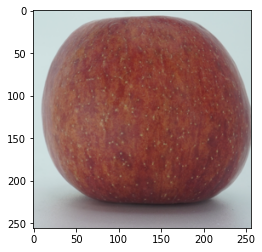

[[0.31177843 0.01161883 0.67660266]]
2
S
apple_fuji_L_80-33_3FR90.png


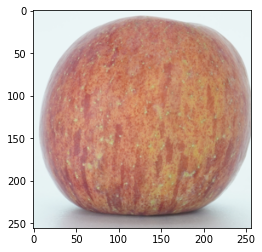

[[1.6573616e-14 9.9999833e-01 1.6261522e-06]]
1
M
apple_fuji_M_80-33_3FR90.png


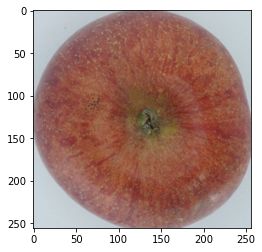

[[1.11748835e-04 2.40330212e-02 9.75855291e-01]]
2
S
apple_fuji_S_81-31_1TOP.png


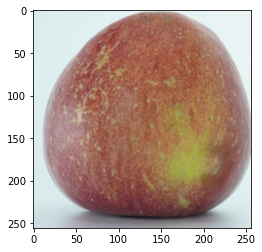

[[1.4208031e-08 9.9878341e-01 1.2165845e-03]]
1
M
apple_fuji_M_83-25_5DI90.png


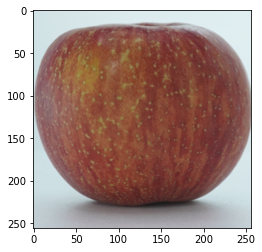

[[6.8226514e-06 1.1063421e-02 9.8892981e-01]]
2
S
apple_fuji_S_83-5_5DI90.png


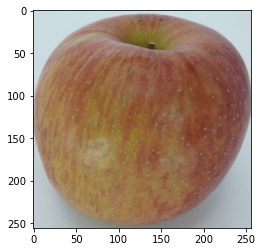

[[3.6331452e-10 1.3097200e-02 9.8690283e-01]]
2
S
apple_fuji_S_78-12_2FR45.png


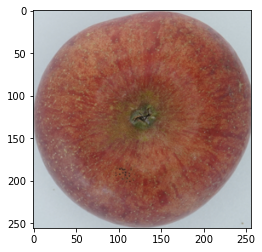

[[6.9968711e-04 5.9590898e-03 9.9334127e-01]]
2
S
apple_fuji_S_81-36_1TOP.png


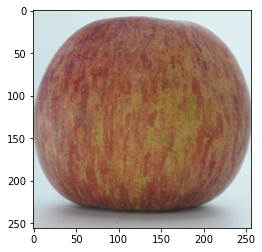

[[1.1947167e-05 4.5845184e-02 9.5414281e-01]]
2
S
apple_fuji_S_77-25_5DI90.png


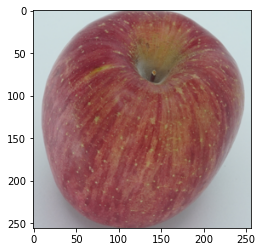

[[0.9723707  0.02514731 0.00248199]]
0
L
apple_fuji_L_85-4_4DI45.png


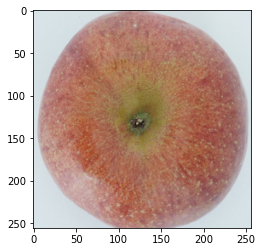

[[1.0542502e-06 9.9779677e-01 2.2021320e-03]]
1
M
apple_fuji_M_84-21_1TOP.png


In [27]:
#이미지 불러오기
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
from random import *
from keras.preprocessing import image
PATH = 'D:/이미지기반_인공지능/팀프로젝트/팀프로젝트_과제1/data/농산물 품질(QC) 이미지/Validation_unzip/apple_fuji/'

#몇번의 테스트?
TESTMAX = 30
#라벨 리스트
labels = ['L','M','S']
#이미지 리스트 만들기
image_list = os.listdir(PATH)

images=[]
image_labels=[]
for i in range(TESTMAX):
    rand = randint(0, len(image_list))
    img_path = PATH + image_list[rand]
    images.append(Image.open(img_path))
    image_labels.append(image_list[rand])
    
#예측하기
for i in range(TESTMAX):
    x = image.img_to_array(images[i])
    x = x.reshape((1,)+x.shape)

    datagen = ImageDataGenerator(rescale=1./255)
    batch = datagen.flow(x, batch_size=1)
    imgplot = plt.imshow(images[i])
    
    plt.imshow(images[i])
    
    pred = model.predict(batch)
    print('==============================================')
    plt.show()
    print(pred)
    print(pred.argmax())
    print(labels[pred.argmax()])
    print(image_labels[i])
    print('==============================================')